<a href="https://colab.research.google.com/github/miguelsmachado/Aproching_any_ML_probloem/blob/main/AAMLP_Supervised_vs_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

Importando os dados no MNIST, já separados em X (valores em pixel) e y (valores esperados da escrita a mão)

In [ ]:
data = datasets.fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True)

Importamos um array do numpy de tamanho 2.
O valor `data[0]` corresponde ao X e o valor `data[1]` corresponde ao y.

In [ ]:
data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

Realizando o desempacotamento da tupla em X e y

In [ ]:
X, y = data

Como `y` é uma lista de strings, vamos converter os valores para inteiros:

In [ ]:
y = y.astype(int)
y

array([5, 0, 4, ..., 4, 5, 6])

Vamos dar uma analidas nos dados que temos:

In [ ]:
print(f"X possui {len(X)}, sendo que cada uma possui {len(X[0])} informações")
print(f"{len(X[0])} corresponde aos {int(np.sqrt(len(X[0])))}x{int(np.sqrt(len(X[0])))} pixels de cada imagem")

X possui 70000, sendo que cada uma possui 784 informações
784 corresponde aos 28x28 pixels de cada imagem


## Visualizando uma única imagem:

1º Vamos reorganizar os dados para termos a configuração de 28x28:

In [ ]:
imagem = X[2].reshape(28, 28)
print(f"O novo formato possui {len(imagem)} linhas por {len(imagem[0])} colunas")

O novo formato possui 28 linhas por 28 colunas


Realizando o plot:

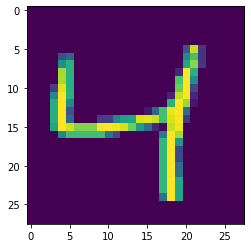

In [ ]:
plt.imshow(imagem);

## Realizando o redimensionamento da imagem para 2 dimensões:

Cada linha de informação possui 784 pixels de informação. Para podermos clusterizar esses dados precisamos reduzir essas 784 colunas, para apenas 2:

In [ ]:
# vamos usar um random state para recebermos sempre o mesmo resultado
tsne = manifold.TSNE(n_components=2, random_state=42)

tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=42, verbose=0)

In [ ]:
# vamos treinar apenas as primeiras 3000 entradas
X_modificado = tsne.fit_transform(X[:3000])

In [ ]:
X_modificado

array([[ -5.281551 , -28.952768 ],
       [-26.105896 , -68.06932  ],
       [-42.503582 ,  35.58039  ],
       ...,
       [ 13.466378 ,  47.369007 ],
       [ -2.4357524,   7.983772 ],
       [ -4.2482643, -13.26691  ]], dtype=float32)

Criando um Pandas Data Frame com os dados redimensionados:

In [ ]:
X_modificado_df = pd.DataFrame(X_modificado, columns=["x", "y"])
X_modificado_df.head()

,x,y
0,-5.281551,-28.952768
1,-26.105896,-68.069321
2,-42.503582,35.580391
3,38.893967,26.663395
4,-14.770573,35.433247


In [ ]:
y_df = pd.DataFrame(y[:3000])
y_df.head()

,0
0,5
1,0
2,4
3,1
4,9


In [ ]:
# juntado os 2
df = X_modificado_df.join(y_df)
df.columns = ['x', 'y', 'targets']

df

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9
...,...,...,...
2995,9.038110,58.850792,7
2996,-29.405334,-60.951775,0
2997,13.466378,47.369007,9
2998,-2.435752,7.983772,1


## Realizando o plot dos dados

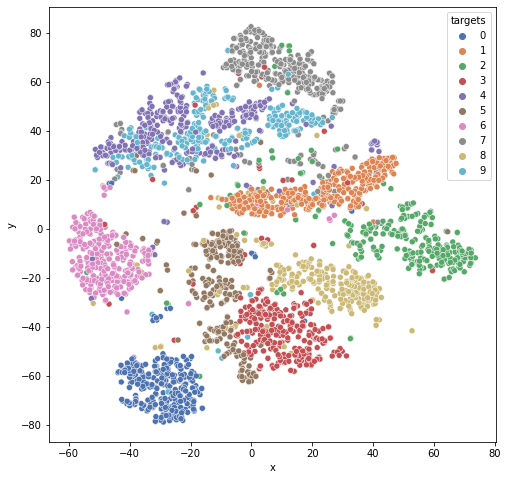

In [ ]:
ax = sns.scatterplot(data=df, x='x', y='y', hue='targets', palette='deep')

ax.figure.set_size_inches(8, 8)

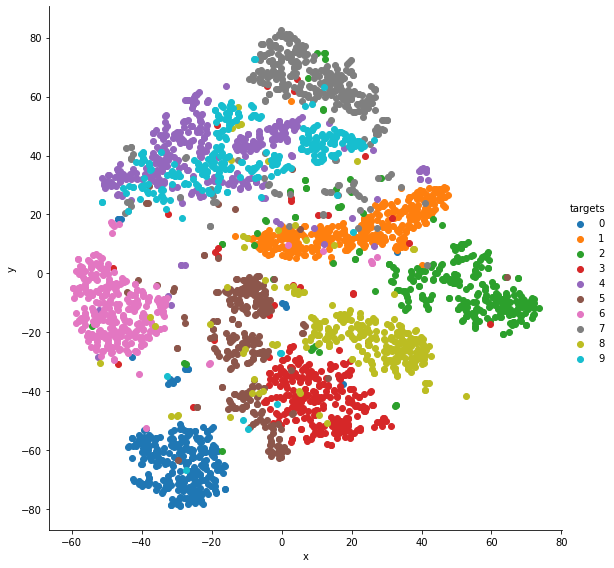

In [ ]:
grid =sns.FacetGrid(df, hue='targets', height=8)

grid.map(plt.scatter, 'x', 'y').add_legend();